In [12]:
# Load packages

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile
import os

# Conda packages used for virtual environment:
# pandas numpy geopandas rasterio contextily fiona ipykernel matplotlib seaborn xarray geowombat rasterstats os

## Getting Geospatial Data

In [4]:
# Import 2024 Congressional data

# Unzip Congressional district shapefile data

path = "../data_2023/2024_us_cd119"

if not os.path.exists(path):
    with zipfile.ZipFile("./data_2023/cb_2024_us_cd119_5m.zip", "r") as zip_ref:
        zip_ref.extractall("./data_2023/2024_us_cd119")
        print("Unzipped successfully.")
else:
    print("Unzipped folder already exists. Skipping extraction.")

Unzipped folder already exists. Skipping extraction.


In [7]:
# Get congressional district spatial data
gdf_cd = gpd.read_file("../data_2023/2024_us_cd119/cb_2024_us_cd119_5m.shp")

# Filter to Ohio only
gdf_cd = gdf_cd[gdf_cd['STATEFP'] == '39']

# Limit to specified columns
columns_gdf_cd = ['CD119FP', 'GEOID', 'geometry']
gdf_cd = gdf_cd[columns_gdf_cd]

# Preview
print(gdf_cd.head())

    CD119FP GEOID                                           geometry
34       06  3906  POLYGON ((-81.84486 39.45022, -81.82576 39.449...
137      13  3913  POLYGON ((-81.68780 41.02566, -81.68762 41.062...
138      02  3902  POLYGON ((-84.31524 39.05734, -84.31481 39.061...
200      09  3909  MULTIPOLYGON (((-82.73280 41.60432, -82.72107 ...
212      15  3915  POLYGON ((-84.43257 40.19704, -84.43396 40.270...


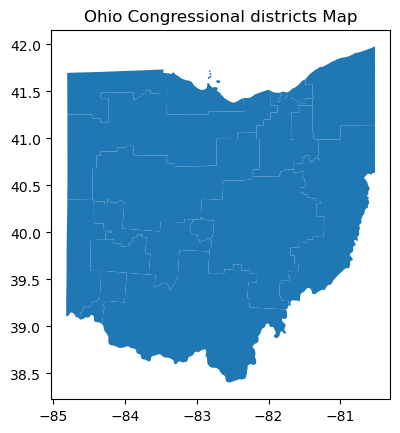

In [8]:
# Reprojecting to epsg:4326

gdf_cd_proj = gdf_cd.to_crs(epsg=4326)

# Map reprojected data
gdf_cd_proj.plot()
plt.title("Ohio Congressional districts Map")
plt.show()

In [ ]:
gdf_cd_proj['CD119'] = 'Ohio ' + gdf_cd_proj['CD119FP']
gdf_cd_proj.head()

# TO DO: Convert CD_ID to two variables: State & CD116FP



,CD119FP,GEOID,geometry,CD119
34,06,3906,"POLYGON ((-81.84486 39.45022, -81.82576 39.449...",Ohio 06
137,13,3913,"POLYGON ((-81.68780 41.02566, -81.68762 41.062...",Ohio 13
138,02,3902,"POLYGON ((-84.31524 39.05734, -84.31481 39.061...",Ohio 02
200,09,3909,"MULTIPOLYGON (((-82.73280 41.60432, -82.72107 ...",Ohio 09
212,15,3915,"POLYGON ((-84.43257 40.19704, -84.43396 40.270...",Ohio 15


In [16]:
turnout_df = pd.read_csv('../data_2023/predict_turnout_ohio_2026.csv')

turnout_gdf = pd.merge(gdf_cd_proj, turnout_df, on="CD119", how="inner")

turnout_gdf.head()

,CD119FP,GEOID,geometry,CD119,Voter Turnout
0,06,3906,"POLYGON ((-81.84486 39.45022, -81.82576 39.449...",Ohio 06,48.55
1,13,3913,"POLYGON ((-81.68780 41.02566, -81.68762 41.062...",Ohio 13,52.98
2,02,3902,"POLYGON ((-84.31524 39.05734, -84.31481 39.061...",Ohio 02,48.65
3,09,3909,"MULTIPOLYGON (((-82.73280 41.60432, -82.72107 ...",Ohio 09,51.55
4,15,3915,"POLYGON ((-84.43257 40.19704, -84.43396 40.270...",Ohio 15,54.18


In [24]:
export_gdf = turnout_gdf.rename(columns={'Voter Turnout':'VoterTurnout'})

export_gdf = export_gdf[["GEOID", "VoterTurnout", "geometry", "CD119"]]
export_gdf.to_file("../ohio_voter_turnout.geojson", driver="GeoJSON")

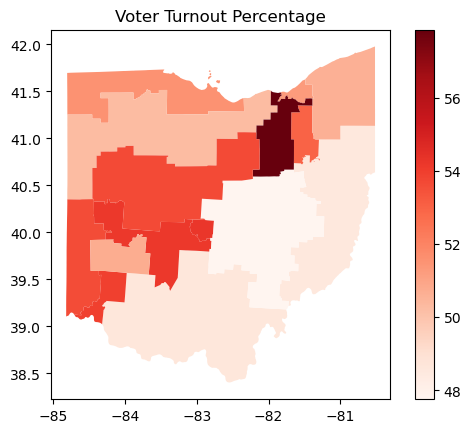

<Figure size 640x480 with 0 Axes>

In [21]:
# Mapping geodataframe based on geometry & voter turnout data
turnout_gdf.plot(column='Voter Turnout', cmap='Reds', legend=True)
plt.title("Voter Turnout Percentage")
plt.show()
plt.savefig("../voter_turnout_2026.png", dpi=300, bbox_inches="tight")